# Full name: Kozhakhmet Nagashybaiuly
# ID: 20B030502
# School: SITE, 3rd Year

# Final Project: Daily Financial Risk Aid

In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [2]:
# American Funds Growth Fund of America.
agthx_csv = pd.read_csv('/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/agthx_stock_history.csv')

# Vertex Pharmaceuticals Inc.
vrtx_csv = pd.read_csv('/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/vrtx_stock_history.csv')

# Enphase Energy Inc.
enph_csv = pd.read_csv('/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/enph_stock_history.csv')

# ON Semiconductor Corp.
on_csv = pd.read_csv('/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/on_stock_history.csv')

In [3]:
def extract_date_components(df, date_column_name):
    df[date_column_name] = df[date_column_name].astype(str)
    df['Year'] = df[date_column_name].str.split('-').str.get(0).astype(int)
    df['Month'] = df[date_column_name].str.split('-').str.get(1).astype(int)
    df['Day'] = df[date_column_name].str.split('-').str.get(2).str.split(' ').str.get(0).astype(int)
    df['Hour'] = df[date_column_name].str.split(' ').str.get(1).str.split(':').str.get(0).astype(int)
    df['Minute'] = df[date_column_name].str.split(' ').str.get(1).str.split(':').str.get(1).astype(int)
    df = df.drop(date_column_name, axis=1)
    return df


#  Analysis and Visualization 

In [4]:
agthx_csv.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-01-02 00:00:00-05:00,0.669569,0.669569,0.669569,0.669569,0,0.0,0.0
1,1980-01-03 00:00:00-05:00,0.681248,0.681248,0.681248,0.681248,0,0.0,0.0
2,1980-01-04 00:00:00-05:00,0.681248,0.681248,0.681248,0.681248,0,0.0,0.0
3,1980-01-07 00:00:00-05:00,0.698766,0.698766,0.698766,0.698766,0,0.0,0.0
4,1980-01-08 00:00:00-05:00,0.706551,0.706551,0.706551,0.706551,0,0.0,0.0


In [5]:
agthx_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10833 entries, 0 to 10832
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10833 non-null  object 
 1   Open          10833 non-null  float64
 2   High          10833 non-null  float64
 3   Low           10833 non-null  float64
 4   Close         10833 non-null  float64
 5   Volume        10833 non-null  int64  
 6   Dividends     10833 non-null  float64
 7   Stock Splits  10833 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 677.2+ KB


In [6]:
agthx_csv.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
agthx_csv.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10833.000000,10833.000000,10833.000000,10833.000000,10833.0,10833.000000,10833.000000
mean,13.969753,13.969753,13.969753,13.969753,0.0,0.000553,0.000185
std,16.083706,16.083706,16.083706,16.083706,0.0,0.010685,0.019216
min,0.593659,0.593659,0.593659,0.593659,0.0,0.000000,0.000000
25%,2.387704,2.387704,2.387704,2.387704,0.0,0.000000,0.000000
50%,9.323874,9.323874,9.323874,9.323874,0.0,0.000000,0.000000
75%,16.211411,16.211411,16.211411,16.211411,0.0,0.000000,0.000000
max,77.493607,77.493607,77.493607,77.493607,0.0,0.380000,2.000000


In [8]:
df=extract_date_components(agthx_csv, 'Date')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10833 entries, 0 to 10832
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10833 non-null  float64
 1   High          10833 non-null  float64
 2   Low           10833 non-null  float64
 3   Close         10833 non-null  float64
 4   Volume        10833 non-null  int64  
 5   Dividends     10833 non-null  float64
 6   Stock Splits  10833 non-null  float64
 7   Year          10833 non-null  int64  
 8   Month         10833 non-null  int64  
 9   Day           10833 non-null  int64  
 10  Hour          10833 non-null  int64  
 11  Minute        10833 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1015.7 KB


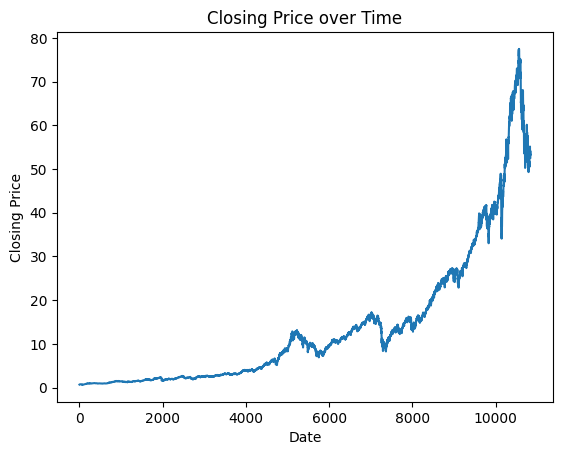

In [10]:
# Line plot of closing price over time.

plt.plot(df['Close'])
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

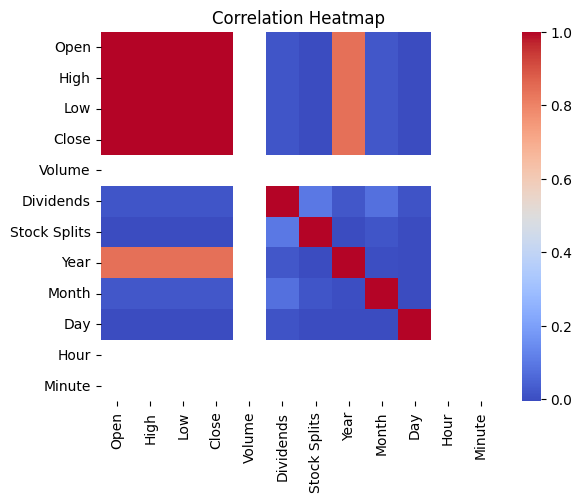

In [11]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This plot will show you how daily price changes vary by both day of the week and hour of the day, allowing you to see if there are any patterns in the data based on these factors.

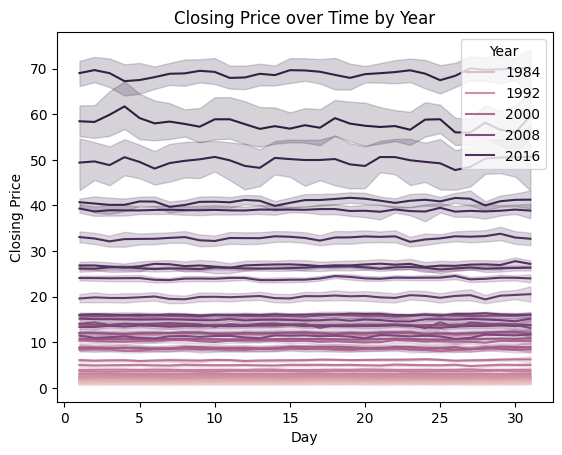

In [12]:
sns.lineplot(x='Day', y='Close', hue='Year', data=df)
plt.title('Closing Price over Time by Year')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.show()

The code generates a line plot of the closing price of a financial instrument over time, grouped by year. It shows how the closing price changes over the year and helps identify any trends and patterns that may exist. By grouping the data by year, it also allows us to compare the performance of the financial instrument across different years.

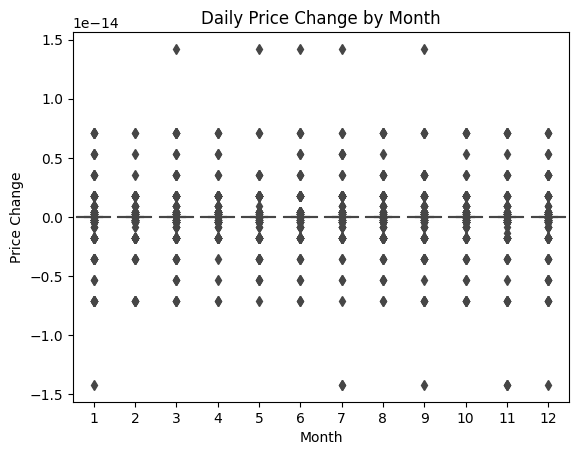

In [13]:
# Box plot of monthly trading volume.

df['Price_Change'] = df['Close'] - df['Open']
sns.boxplot(x='Month', y='Price_Change', data=df)
plt.title('Daily Price Change by Month')
plt.xlabel('Month')
plt.ylabel('Price Change')
plt.show()

This plot will show you the distribution of daily price changes (the difference between the opening and closing prices) across different months, allowing you to see if there are any seasonal patterns in the price changes.

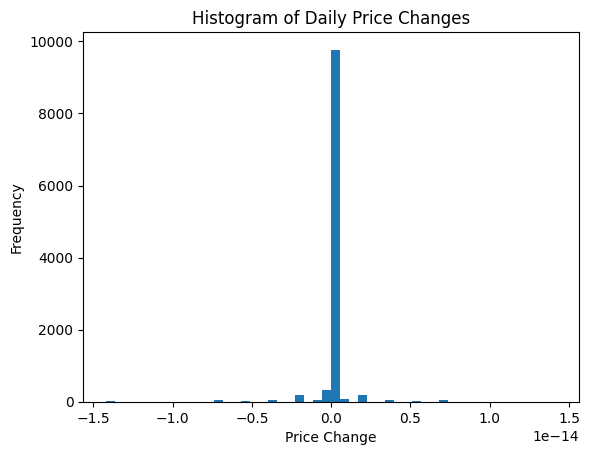

In [14]:
df['Price_Change'] = df['Close'] - df['Open']
plt.hist(df['Price_Change'], bins=50)
plt.title('Histogram of Daily Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

The histogram shows the frequency distribution of daily price changes of a financial instrument. The x-axis represents the price change, while the y-axis represents the frequency of price changes within that range. The histogram can help to identify the most common daily price changes and the spread of the price changes around the mean. It can also indicate whether the price changes follow a normal distribution or if there are any outliers in the data. Overall, the histogram provides useful insights into the volatility of the financial instrument and can help investors make informed decisions.

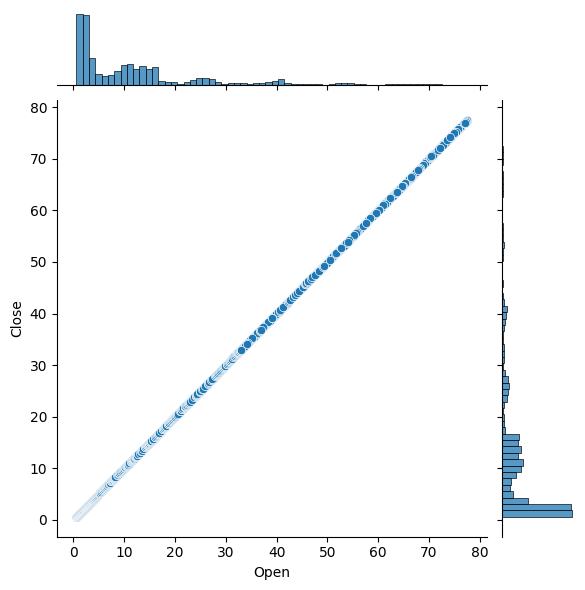

In [15]:
sns.jointplot(x='Open', y='Close', data=df, kind='scatter')
plt.show()

This will create a scatterplot of the opening price vs. the closing price, with histograms along the margins showing the distribution of each variable. The kind='scatter' argument specifies that we want a scatterplot rather than a regression plot.

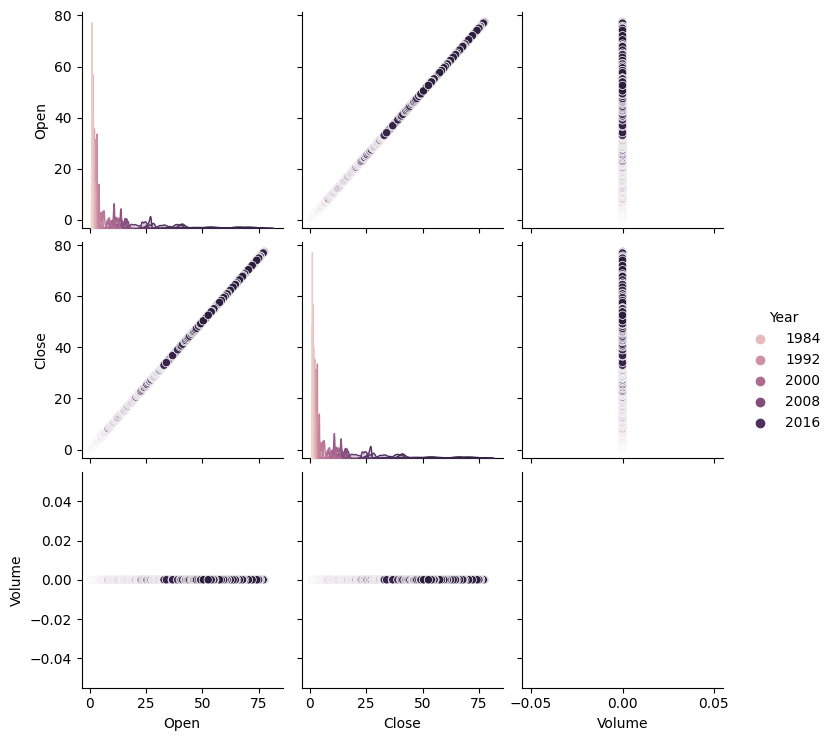

In [16]:
sns.pairplot(data=df[['Open', 'Close', 'Volume', 'Year']], hue='Year')
plt.show()

This will create a grid of scatterplots and histograms showing the relationships between the opening price, closing price, trading volume, and year. The hue='Year' argument specifies that we want to color the points by the year in which they occurred, making it easier to see how the relationships between the variables have changed over time.

# Training the model and Performance of model

In [17]:
from pyspark.sql.functions import year, month, dayofmonth, hour, minute, second
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

def evaluate_linear_regression(file_path):
    # Create a SparkSession object
    spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

    # Load the data into a PySpark DataFrame
    df = spark.read.format("csv").option("header", "true").load(file_path)

    # Convert the "Date" column into separate "Year", "Month", "Day", "Hour", "Minute", and "Second" columns
    df = df.withColumn("Year", year("Date").cast("integer")) \
           .withColumn("Month", month("Date").cast("integer")) \
           .withColumn("Day", dayofmonth("Date").cast("integer")) \
           .withColumn("Hour", hour("Date").cast("integer")) \
           .withColumn("Minute", minute("Date").cast("integer")) \
           .withColumn("Second", second("Date").cast("integer")) \
           .drop("Date")

    # Convert certain columns to double type
    cols_to_convert = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
    for col in cols_to_convert:
        df = df.withColumn(col, df[col].cast("double"))

    # Create a list of input columns for the linear regression model
    input_cols = ["Open", "High", "Low", "Volume", "Dividends", "Stock Splits", "Year", "Month", "Day", "Hour", "Minute", "Second"]

    # Vectorize the input columns
    assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
    data = assembler.transform(df)

    # Split the data into training and testing sets
    (training_data, testing_data) = data.randomSplit([0.7, 0.3])

    # Train the linear regression model
    lr = LinearRegression(featuresCol="features", labelCol="Close", maxIter=10, regParam=0.3, elasticNetParam=0.8)
    lr_model = lr.fit(training_data)

    # Make predictions on the testing data
    predictions = lr_model.transform(testing_data)

    # Evaluate the predictions using RMSE
    evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)

    # Evaluate the predictions using MSE
    evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)

    # Evaluate the predictions using R2
    evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="r2")
    r2 = evaluator.evaluate(predictions)

    # Stop the SparkSession
#     spark.stop()
    
    print("RMSE: ", rmse)
    print("MSE: ", mse)
    print("R2: ", r2)

    # Return the metrics
    return df, lr_model, testing_data, training_data

In [18]:
def plot_close_vs_predicted_by_year(df, lr_model, testing_data):
    # Group the data by year and compute the mean of the Close column
    close_by_year = df.groupby("Year").mean("Close").orderBy("Year")

    # Extract the years and Close values as separate arrays
    years = close_by_year.select("Year").rdd.flatMap(lambda x: x).collect()
    close_values = close_by_year.select("avg(Close)").rdd.flatMap(lambda x: x).collect()

    # Make predictions on the testing data
    predictions = lr_model.transform(testing_data)

    # Create a DataFrame with predicted values and corresponding year
    pred_df = predictions.select("prediction", "Year").groupBy("Year").mean("prediction").orderBy("Year")

    # Extract the predicted close values and year from the DataFrame
    pred_close = pred_df.select("avg(prediction)").rdd.flatMap(lambda x: x).collect()

    # Plot the Close values and Predicted Close values against the year
    plt.plot(years, close_values, 'go-', label='Close')
    plt.plot(years, pred_close, 'ro-', label='Predicted Close')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title("Close vs Predicted Close by Year")
    plt.legend()
    plt.show()

In [19]:
import matplotlib.pyplot as plt

def plot_close_vs_predicted_close_by_selected_year(df, year, model, testing_data):
    # Filter the data to include only the given year
    df_year = df.filter(df.Year == year)

    # Group the data by month and compute the mean of the Close column
    close_by_month = df_year.groupby("Month").mean("Close").orderBy("Month")

    # Extract the months and Close values as separate arrays
    months = close_by_month.select("Month").rdd.flatMap(lambda x: x).collect()
    close_values = close_by_month.select("avg(Close)").rdd.flatMap(lambda x: x).collect()

    # Plot the Close values
    plt.plot(months, close_values, 'go-', label="Close")

    # Make predictions on the testing data
    predictions = model.transform(testing_data)

    # Filter the predictions to include only the given year
    pred_year = predictions.filter(predictions.Year == year)

    # Create a DataFrame with predicted values and corresponding month
    pred_by_month = pred_year.select("prediction", "Month").groupBy("Month").mean("prediction").orderBy("Month")

    # Extract the predicted close values as a separate array
    pred_close = pred_by_month.select("avg(prediction)").rdd.flatMap(lambda x: x).collect()

    # Plot the predicted Close values
    plt.plot(months, pred_close, 'ro-', label="Predicted Close")

    # Set the axis labels and title
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.title(f"Close vs Predicted Close for {year}")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

In [20]:
from pyspark.sql.functions import year, month, dayofmonth, hour, minute, second
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
import calendar

def plot_close_vs_predicted_close_by_month(file_path, lr_model, Year, Month):
    # Create a SparkSession object
    spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

    # Load the data into a PySpark DataFrame
    df = spark.read.format("csv").option("header", "true").load(file_path)

    # Convert the "Date" column into separate "Year", "Month", "Day", "Hour", "Minute", and "Second" columns
    df = df.withColumn("Year", year("Date").cast("integer")) \
           .withColumn("Month", month("Date").cast("integer")) \
           .withColumn("Day", dayofmonth("Date").cast("integer")) \
           .withColumn("Hour", hour("Date").cast("integer")) \
           .withColumn("Minute", minute("Date").cast("integer")) \
           .withColumn("Second", second("Date").cast("integer")) \
           .drop("Date")

    # Convert certain columns to double type
    cols_to_convert = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
    for col in cols_to_convert:
        df = df.withColumn(col, df[col].cast("double"))

    # Create a list of input columns for the linear regression model
    input_cols = ["Open", "High", "Low", "Volume", "Dividends", "Stock Splits", "Year", "Month", "Day", "Hour", "Minute", "Second"]

    # Vectorize the input columns
    assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
    data = assembler.transform(df)
    
    may_data = data.filter((data.Year == Year) & (data.Month == Month))

    actual_close = may_data.select("Close").rdd.flatMap(lambda x: x).collect()

    lr_predictions = lr_model.transform(may_data)
    predicted_close = lr_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

    plt.plot(actual_close, 'go-', label="Actual Close")
    plt.plot(predicted_close, 'ro-', label="Predicted Close")
    plt.xlabel("Day")
    plt.ylabel("Price")
    plt.title('Actual vs. Predicted Close Prices for %s %d' % (calendar.month_name[Month], Year))
    plt.legend()
    plt.show()

# 1) American Funds Growth Fund of America

In [21]:
df1, lr_model, testing_data, training_data = evaluate_linear_regression("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/agthx_stock_history.csv")

23/05/12 00:44:58 WARN Utils: Your hostname, MacBook-Pro-Kozhakhmet.local resolves to a loopback address: 127.0.0.1; using 172.20.10.2 instead (on interface en0)
23/05/12 00:44:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/12 00:44:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/12 00:45:19 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/12 00:45:19 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


RMSE:  0.26999935452445295
MSE:  0.07289965144362123
R2:  0.9997381843940881


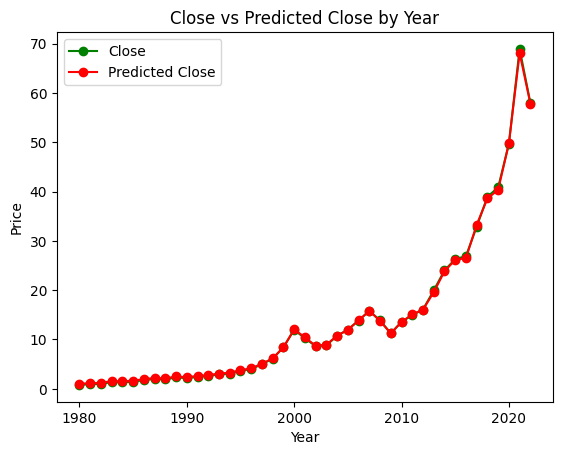

In [22]:
plot_close_vs_predicted_by_year(df1, lr_model, testing_data)

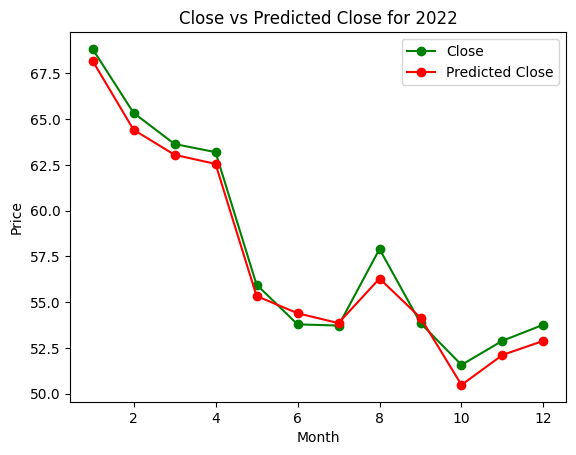

In [23]:
plot_close_vs_predicted_close_by_selected_year(df1, 2022, lr_model, testing_data)

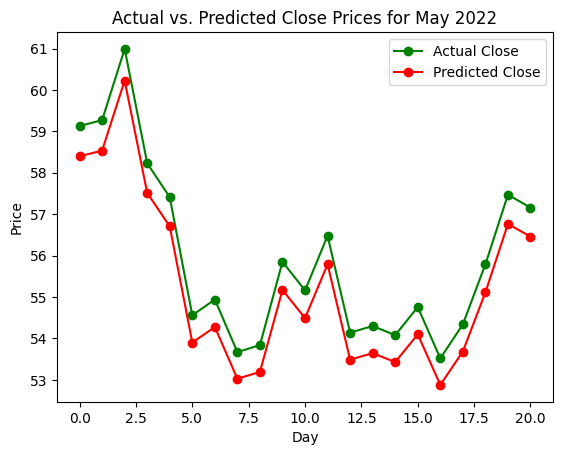

In [24]:
plot_close_vs_predicted_close_by_month("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/agthx_stock_history.csv",
               lr_model, 2022, 5)

# 2) Vertex Pharmaceuticals Inc.

In [25]:
df2, lr_model, testing_data, training_data = evaluate_linear_regression("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/vrtx_stock_history.csv")

RMSE:  1.568446336699547
MSE:  2.4600239111062288
R2:  0.9995379462969332


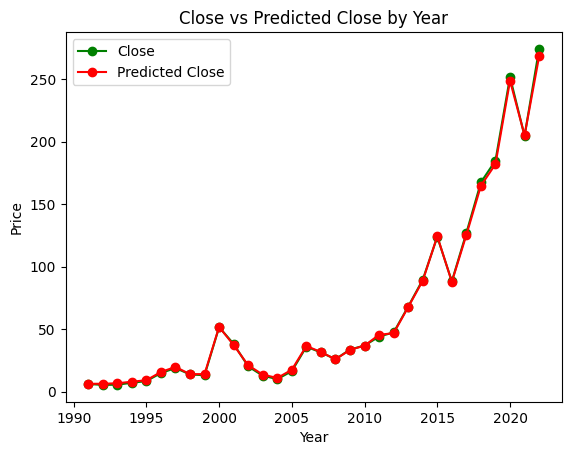

In [26]:
plot_close_vs_predicted_by_year(df2, lr_model, testing_data)

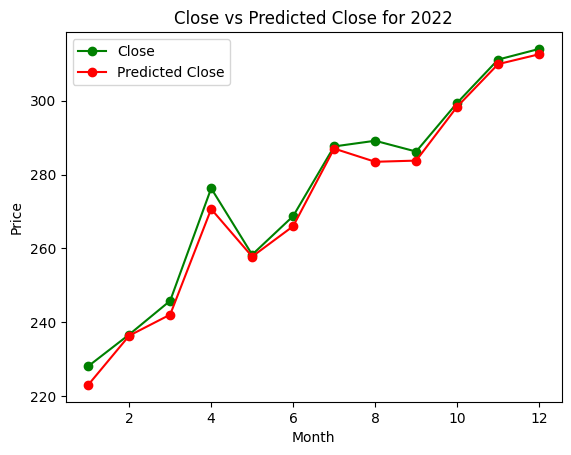

In [27]:
plot_close_vs_predicted_close_by_selected_year(df2, 2022, lr_model, testing_data)

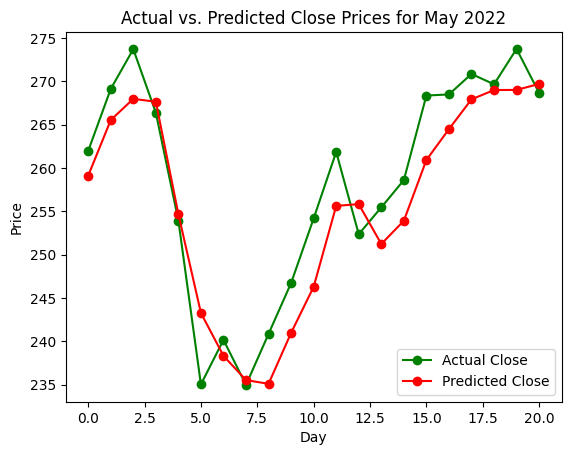

In [28]:
plot_close_vs_predicted_close_by_month("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/vrtx_stock_history.csv",
               lr_model, 2022, 5)

# 3) Enphase Energy Inc.

In [29]:
df3, lr_model, testing_data, training_data = evaluate_linear_regression("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/enph_stock_history.csv")

RMSE:  2.409557968299586
MSE:  5.805969602596028
R2:  0.998993443148851


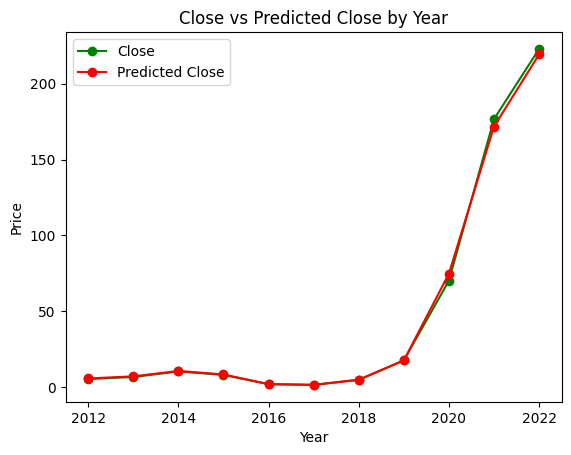

In [30]:
plot_close_vs_predicted_by_year(df3, lr_model, testing_data)

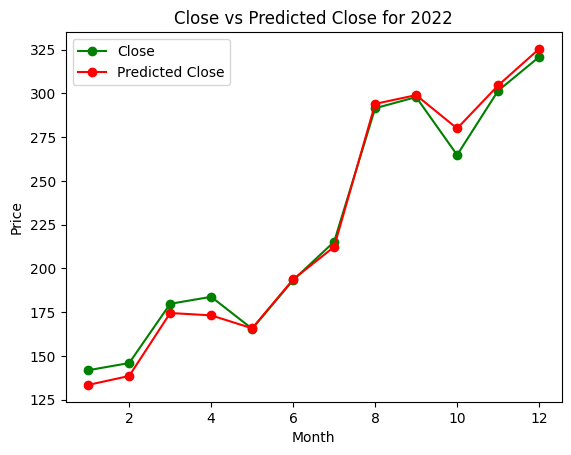

In [31]:
plot_close_vs_predicted_close_by_selected_year(df3, 2022, lr_model, testing_data)

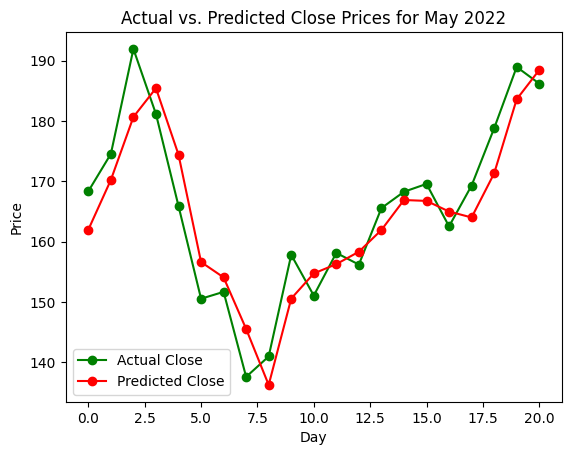

In [32]:
plot_close_vs_predicted_close_by_month("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/enph_stock_history.csv",
               lr_model, 2022, 5)

# 4) ON Semiconductor Corp.

In [33]:
df4, lr_model, testing_data, training_data = evaluate_linear_regression("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/on_stock_history.csv")

RMSE:  0.4439262516358175
MSE:  0.19707051689142716
R2:  0.9989693878812745


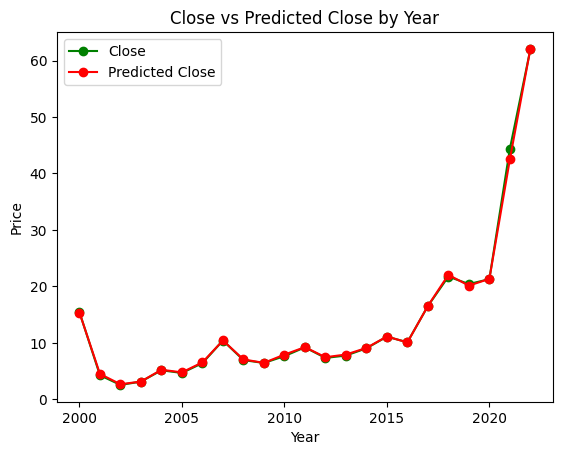

In [34]:
plot_close_vs_predicted_by_year(df4, lr_model, testing_data)

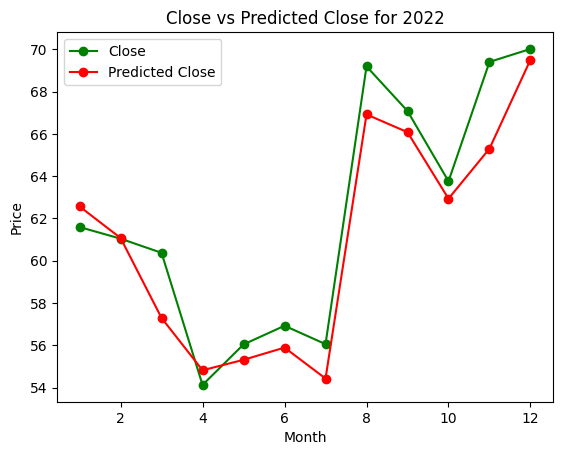

In [35]:
plot_close_vs_predicted_close_by_selected_year(df4, 2022, lr_model, testing_data)

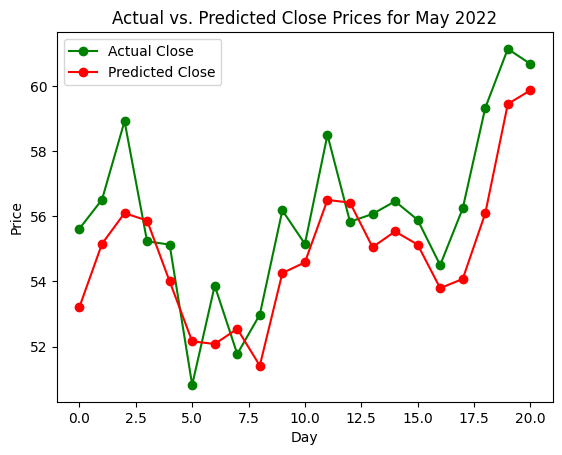

In [36]:
plot_close_vs_predicted_close_by_month("/Users/kozhahmet/Desktop/Spring Semester 2022-2023/Data Storage & Analysis/Final Project/EECS6893_Daily_Financial_Aid-main/Financial_Data/on_stock_history.csv",
               lr_model, 2022, 5)